# <center>  Code python de la première partie du projet d'économétrie - Régression </center> #

Ce notebook contient le script python utilisé pour quelques question de la partie  regréssion du projet d'économétrie . On rappelle que le travail a été réalisé à la fois sous python et matlab . La partie théorique ainsi que le code matlab  ont été developpés dans le rapport. 
##### Le travail a été réalisé par Mohamed DHAOUI  et Matthieu Roussel 

## Import des packages

In [7]:
import pandas as pd
import warnings
import pandas as pd # maniulation des données 
import numpy as np # opérations mathématiques

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import t  # determination des seuil de student et la valeur critique


from sklearn import linear_model ##pour la regression linéare
%matplotlib notebook 

warnings.filterwarnings('ignore')

## Question 1

In [2]:
df = pd.read_csv('MROZ.raw', sep='\s+', header= None )
df = df.rename(columns={0:'inlf',
                      1:'hours',
                     2:'kidslt6',
                     3:'kidsge6',
                     4:'age',
                     5:'educ',
                     6:'wage',
                     7:'repwage',
                     8:'hushrs',
                     9:'husage',
                     10:'huseduc',
                     11:'huswage',
                     12:'faminc',
                     13:'mtr',
                     14:'motheduc',
                     15:'fatheduc',
                     16:'unem',
                     17:'city',
                     18:'exper',
                     19:'nwifeinc',
                     20:'lwage',
                     21:'expersq'})
df.head(20)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
5,1,2032,0,0,54,12,4.7421,4.70,1040,57,...,19495,0.6915,14,7,7.5,1,33,9.859054,1.55648,1089
6,1,1440,0,2,37,16,8.3333,5.95,2670,37,...,21152,0.6915,14,7,5.0,0,11,9.152048,2.12026,121
7,1,1020,0,0,54,12,7.8431,9.98,4120,53,...,18900,0.6915,3,3,5.0,0,35,10.900040,2.059634,1225
8,1,1458,0,2,48,12,2.1262,0.00,1995,52,...,20405,0.7515,7,7,3.0,0,24,17.305000,.7543364,576
9,1,1600,0,2,39,12,4.6875,4.15,2100,43,...,20425,0.6915,7,7,5.0,0,21,12.925000,1.544899,441


In [3]:
df.wage = pd.to_numeric(df.wage, errors='coerce')
df.lwage = pd.to_numeric(df.lwage, errors='coerce')
df.fatheduc = pd.to_numeric(df.fatheduc, errors='coerce')
df.motheduc = pd.to_numeric(df.motheduc, errors='coerce')
df.educ = pd.to_numeric(df.educ, errors='coerce')
df.exper = pd.to_numeric(df.exper, errors='coerce')
df.nwifeinc = pd.to_numeric(df.nwifeinc, errors='coerce')
df.kidslt6 = pd.to_numeric(df.kidslt6, errors='coerce')
df.kidsge6 = pd.to_numeric(df.kidsge6, errors='coerce')
df.huswage= pd.to_numeric(df.huswage, errors='coerce')

In [4]:
df=df[df.wage > 0]

## Question 2

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<IPython.core.display.Javascript object>


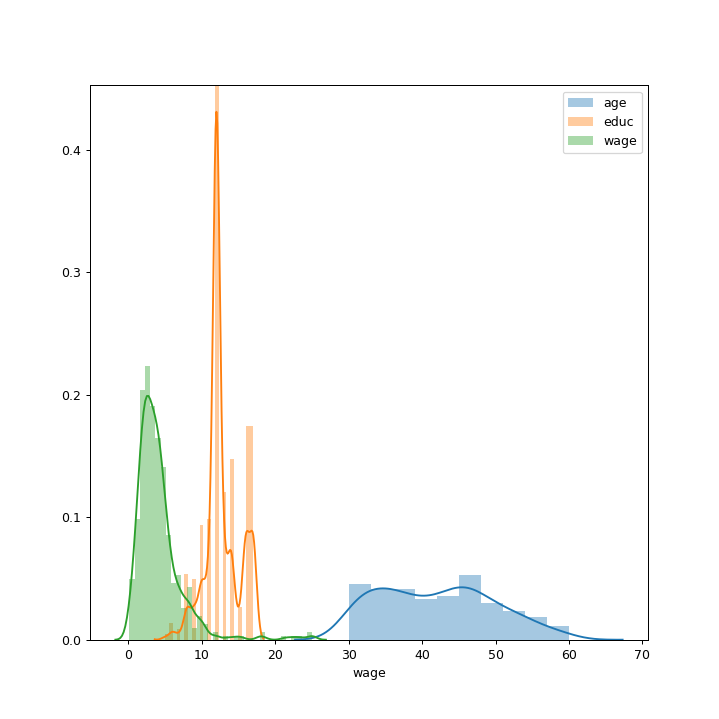

In [9]:
from scipy import stats
plt.figure(figsize=(8,8))
sns.distplot(df.age,kde=True,label="age")
sns.distplot(df.educ,kde=True,label="educ")
sns.distplot(df.wage,kde=True,label="wage")
plt.legend()
plt.show()

In [15]:
df.describe()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,428.0,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,1.0,1302.929907,0.140187,1.350467,41.971963,12.658879,4.177682,3.185864,2233.464953,44.609813,...,24130.422897,0.668333,9.516355,8.988318,8.545561,0.640187,13.037383,18.937483,1.190173,234.719626
std,0.0,776.274385,0.391923,1.315935,7.721084,2.285376,3.310282,2.439640,582.908769,7.950055,...,11671.255986,0.076936,3.308100,3.523405,3.033328,0.480507,8.055923,10.591354,0.723198,270.043358
min,1.0,12.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,30.000000,...,2400.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.000000,-0.029057,-2.054164,0.000000
25%,1.0,609.500000,0.000000,0.000000,35.000000,12.000000,2.262600,1.420000,1920.000000,38.000000,...,16286.250000,0.621500,7.000000,7.000000,7.500000,0.000000,7.000000,12.365247,0.816509,49.000000
50%,1.0,1365.500000,0.000000,1.000000,42.000000,12.000000,3.481900,3.195000,2106.500000,45.000000,...,21961.000000,0.691500,10.000000,7.000000,7.500000,1.000000,12.000000,17.080000,1.247574,144.000000
75%,1.0,1910.500000,0.000000,2.000000,47.250000,14.000000,4.970750,4.550000,2504.000000,51.000000,...,29793.000000,0.721500,12.000000,12.000000,11.000000,1.000000,18.000000,23.515000,1.603571,324.000000
max,1.0,4950.000000,2.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,...,91044.000000,0.941500,17.000000,17.000000,14.000000,1.000000,38.000000,91.000000,3.218876,1444.000000


<IPython.core.display.Javascript object>


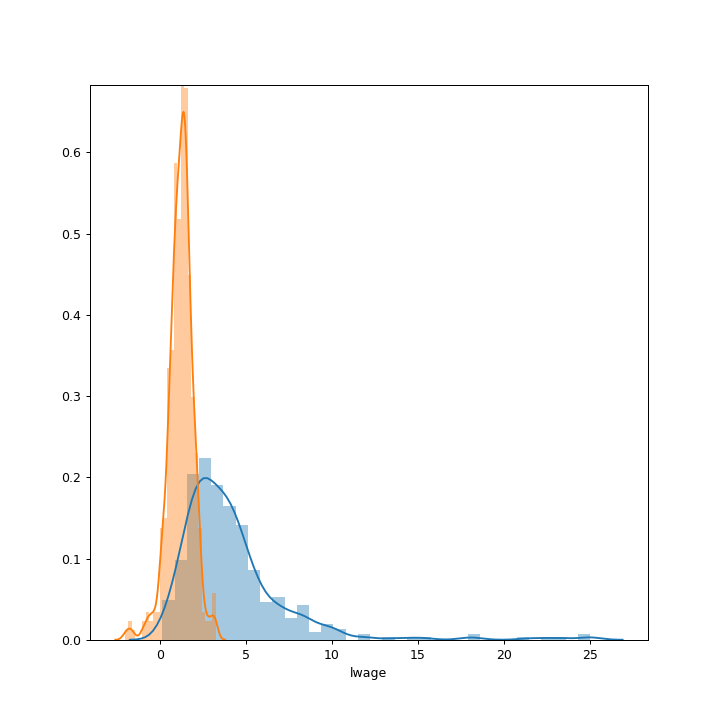

In [10]:
plt.figure(figsize=(8,8))

sns.distplot(df.wage)
sns.distplot(df.lwage)

Sans log , l'histogramme ressemble plus à une gaussienne
graphiquement ça l'air d'une gaussienne ,mais la pvalue du test de shapiro montre que le test n'est pas concluant 

In [11]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro


## test of normality

In [12]:
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(df.lwage)
print('Statistics=%.3f, p=%.8f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.961, p=0.00000000
Sample does not look Gaussian (reject H0)


In [14]:
from scipy.stats.stats import pearsonr   

pearsonr(df.motheduc,df.fatheduc)

(0.5540632184311679, 8.302344435823935e-36)

<IPython.core.display.Javascript object>


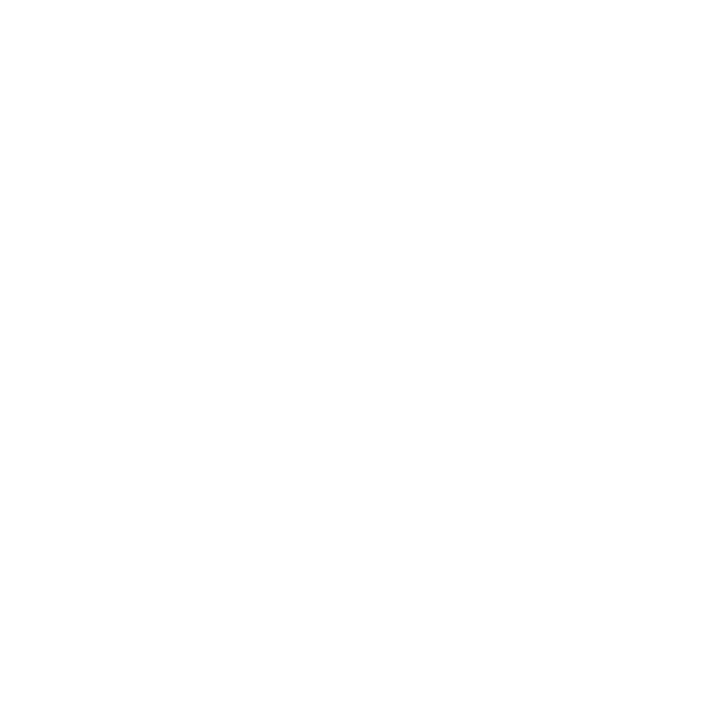

<IPython.core.display.Javascript object>


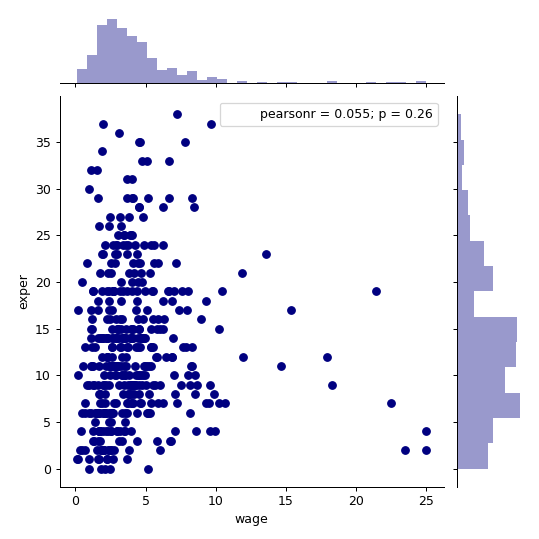

<IPython.core.display.Javascript object>


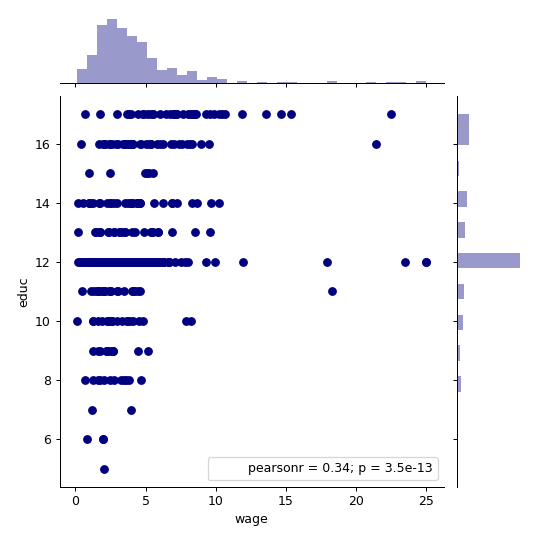

<IPython.core.display.Javascript object>


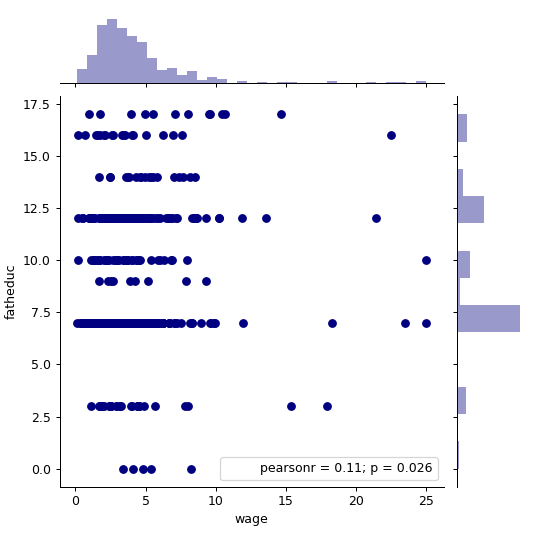

In [15]:

plt.figure(figsize=(8,8))

sns.jointplot(df.wage,df.exper, color = 'navy')
sns.jointplot(df.wage,df.educ, color = 'navy')
sns.jointplot(df.wage,df.fatheduc, color = 'navy')


## Question 7

In [16]:
from sklearn.linear_model import LinearRegression


X = df[['city', 'educ','exper','nwifeinc','kidslt6','kidsge6']]

y = df['wage']

lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print( "estimated coefficient :")
lm.coef_

estimated coefficient :


array([ 0.36975203,  0.4600477 ,  0.02381995,  0.01524479,  0.03617319,
       -0.06189091])

In [18]:
print( "estimated intercept :")
lm.intercept_

estimated intercept :


-2.4034539915471367

<IPython.core.display.Javascript object>


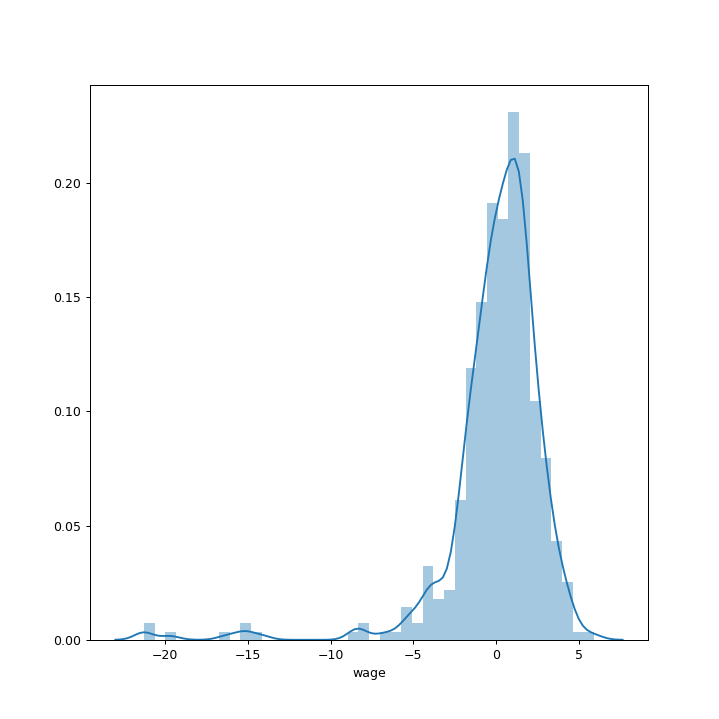

In [19]:
plt.figure(figsize=(8,8))
residuals1=lm.predict(X)-y
sns.distplot(residuals1)

<IPython.core.display.Javascript object>


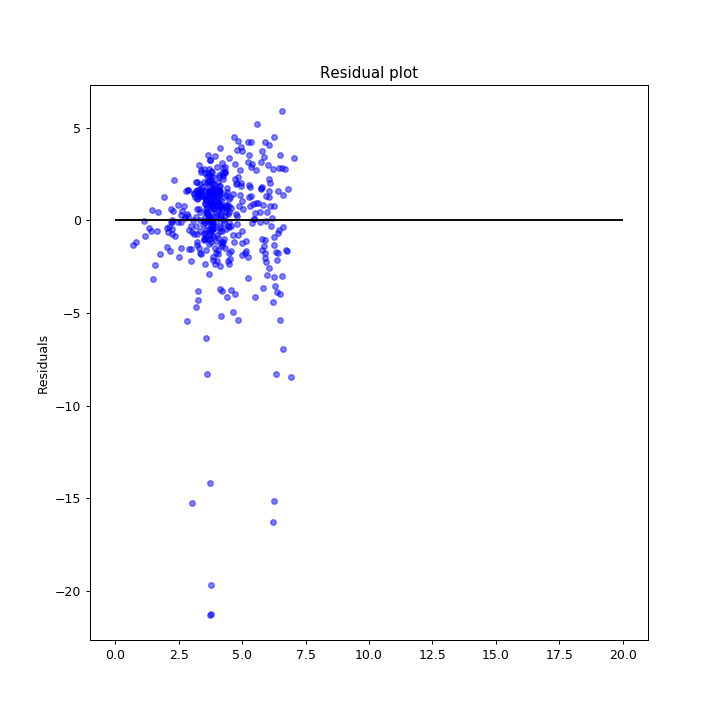

Text(0, 0.5, 'Residuals')

In [28]:
plt.figure(figsize=(8,8))

plt.scatter(lm.predict(X),lm.predict(X)-y,c='b',s=20,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=20)
plt.title ( 'Residual plot')
plt.ylabel('Residuals')

## Question 8

In [20]:
from sklearn.linear_model import LinearRegression


X = df[['city', 'educ','exper','nwifeinc','kidslt6','kidsge6']]

y = df['lwage']

lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print( "estimated coefficient :")
lm.coef_

estimated coefficient :


array([ 0.03526789,  0.10224755,  0.01548787,  0.0048827 , -0.04530287,
       -0.01170351])

<IPython.core.display.Javascript object>


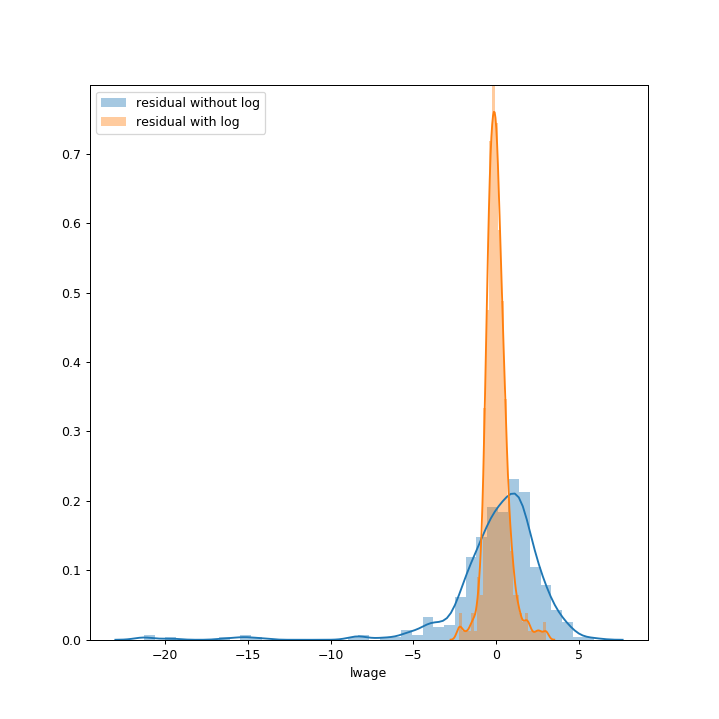

In [22]:
plt.figure(figsize=(8,8))
residuals2=lm.predict(X)-y
sns.distplot(residuals1,label="residual without log")
sns.distplot(residuals2,label="residual with log")
plt.legend()
plt.show()

## Question 9

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.regression import linear_model
from statsmodels.api import add_constant

formula = 'wage ~ city+educ+exper+nwifeinc+kidslt6+kidsge6'
results = ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.41e-10
Time:                        17:10:09   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4035      0.963     -2.495      0.0

In [25]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.regression import linear_model
from statsmodels.api import add_constant

formula = 'lwage ~ city+educ+exper+nwifeinc+kidslt6+kidsge6'
results = ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.00e-13
Time:                        17:10:12   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3990      0.207     -1.927      0.0

In [26]:
hypotheses = 'exper = 0'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0155      0.004      3.452      0.001       0.007       0.024


In [27]:
p_val=t_test.pvalue
print(p_val)

0.0006133650790142509


In [28]:
beta1=t_test.effect[0]
sd_beta1=t_test.sd[0][0]
nb_obs=X.shape[0]
p=X.shape[1]

############################## test de rejet beta1 ###################
print ( "L'hypothèse H0 : la pente Beta1=0 ")
t_stat_beta1=beta1/sd_beta1  # la statistique du test

alpha = 0.05 # on fera un test à 95%
degreef=nb_obs-p-1 # degré de liberté : n-p-1
cv = t.ppf(1.0 - (alpha/2), degreef) # critical value , on pourra la lire aussi sur la table de loi de student

rejecth0_beta1=abs(t_stat_beta1) > cv  # true si on rejette l'hyothèse
 
p_val_beta1 = (1 - t.cdf(abs(t_stat_beta1), degreef)) * 2 # p_value

if rejecth0_beta1 :
    print("on rejette H0 , il faut garder la  var exper"+ "---- La p-value du test = "+ str(p_val_beta1))
else :
    print("on accepte H0 , il faut éliminer la var exper "+ "---- La p-value du test = "+ str(p_val_beta1))



L'hypothèse H0 : la pente Beta1=0 
on rejette H0 , il faut garder la  var exper---- La p-value du test = 0.0006133650790143275


La p-value obtenue est très faible ,on rejete l'hypothèse de nullité pour tous les seuils . La variable exper  est significative  

## Question 10

In [29]:
hypotheses = 'educ = 0.1'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1022      0.015      0.149      0.882       0.073       0.132


In [30]:
beta1=t_test.effect[0]-0.1
sd_beta1=t_test.sd[0][0]
nb_obs=X.shape[0]
p=X.shape[1]

############################## test de rejet beta1 ###################
print ( "L'hypothèse H0 : le coef de educ =0.1 ")
t_stat_beta1=beta1/sd_beta1  # la statistique du test

alpha = 0.05 # on fera un test à 95%
degreef=nb_obs-p-1 # degré de liberté : n-p-1
cv = t.ppf(1.0 - (alpha/2), degreef) # critical value , on pourra la lire aussi sur la table de loi de student

rejecth0_beta1=abs(t_stat_beta1) > cv  # true si on rejette l'hyothèse
 
p_val_beta1 = (1 - t.cdf(abs(t_stat_beta1), degreef)) * 2 # p_value
p_val_beta1


L'hypothèse H0 : le coef de educ =0.1 


0.8817616705977172

la p-value est supérieur à 5% , on accepte l'hypothese que le coef d''educ = .1

## Question 11

In [31]:
hypotheses = '(educ = 0.1),(exper=0.05)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[29.58075262]]), p=9.535559958512219e-13, df_denom=421, df_num=2>


In [34]:
results.f_pvalue

2.004420416906004e-13

## Question 13 

In [36]:
hypotheses = "kidslt6=kidsge6"
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0336      0.090     -0.372      0.710      -0.211       0.144


In [42]:
results.cov_params()

,Intercept,city,educ,exper,nwifeinc,kidslt6,kidsge6
Intercept,0.042870,-0.001143,-0.002589,-0.000362,-0.000041,0.000242,-0.002124
city,-0.001143,0.004925,-0.000088,-0.000008,-0.000051,-0.000091,0.000142
educ,-0.002589,-0.000088,0.000228,-0.000001,-0.000014,-0.000197,0.000040
exper,-0.000362,-0.000008,-0.000001,0.000020,0.000003,0.000066,0.000045
nwifeinc,-0.000041,-0.000051,-0.000014,0.000003,0.000011,0.000029,-0.000002
kidslt6,0.000242,-0.000091,-0.000197,0.000066,0.000029,0.007277,-0.000083
kidsge6,-0.002124,0.000142,0.000040,0.000045,-0.000002,-0.000083,0.000726


In [43]:
cov=results.cov_params().values[5][6]

In [37]:
variance=results.cov_params().values[5][5]+results.cov_params().values[6][6]-2*results.cov_params().values[5][6]
t_static=(results.params[5]-results.params[6]) /variance**(0.5)
t_static

-0.37174737908012845

In [38]:
variance=results.cov_params().values[5][5]+results.cov_params().values[6][6]-2*results.cov_params().values[5][6]
t_static=(results.params[5]-results.params[6]) /variance**(0.5)


############################## test de rejet beta1 ###################
print ( "L'hypothèse H0 :  kidslt6=kidsge6 ")
t_stat_beta1=t_static  # la statistique du test
p=2
nb_obs=X.shape[0]
alpha = 0.05 # on fera un test à 95%
degreef=nb_obs-p-1 # degré de liberté : n-p-1
cv = t.ppf(1.0 - (alpha/2), degreef) # critical value , on pourra la lire aussi sur la table de loi de student

rejecth0_beta1=abs(t_stat_beta1) > cv  # true si on rejette l'hyothèse
 
p_val_beta1 = (1 - t.cdf(abs(t_stat_beta1), degreef)) * 2 # p_value
p_val_beta1


L'hypothèse H0 :  kidslt6=kidsge6 


0.7102662151494616

## Question 14 

In [39]:
pred_val = results.fittedvalues.copy()
true_val = df['lwage'].values.copy()
residual = true_val - pred_val


<IPython.core.display.Javascript object>


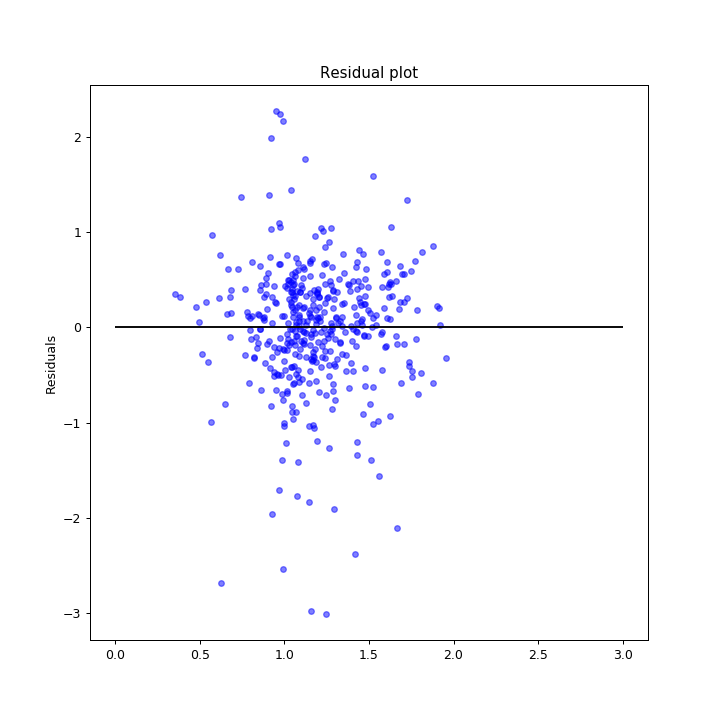

Text(0, 0.5, 'Residuals')

In [40]:
plt.figure(figsize=(8,8))

plt.scatter(lm.predict(X),residual,c='b',s=20,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=3)
plt.title ( 'Residual plot')
plt.ylabel('Residuals')

<IPython.core.display.Javascript object>


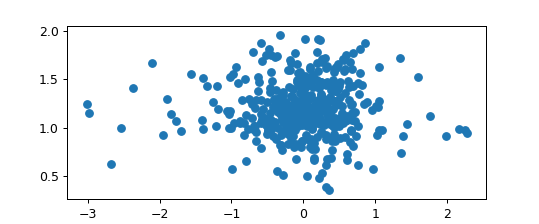

In [33]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [42]:
import statsmodels

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual,add_constant(X))
pval, f_pval


(0.06397089663261532, 0.06334090716629054)

####  from scratch 

In [43]:
lm = LinearRegression()
lm.fit(X,residual**2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# compute with formulas from the theory
yhat = lm.predict(X)
SS_Residual = sum((residual**2-yhat)**2)
SS_Total = sum((residual**2-np.mean(residual**2))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

In [45]:
r_obs=r_squared *nb_obs

In [46]:
#scipy.stats.chisquare(r_obs,ddof=6)
import scipy.stats
1-scipy.stats.chi2.cdf(x=r_obs,df=6)

0.06397089663261635

In [47]:
from statsmodels.regression import linear_model
from statsmodels.api import add_constant

model = linear_model.OLS(y, X)
results = model.fit()
print(results.params) # 
print(results.pvalues) # 


city        0.024635
educ        0.078156
exper       0.012123
nwifeinc    0.004503
kidslt6    -0.043049
kidsge6    -0.031475
dtype: float64
city        7.257676e-01
educ        1.702604e-18
exper       3.646084e-03
nwifeinc    1.777645e-01
kidslt6     6.151834e-01
kidsge6     2.086158e-01
dtype: float64


In [49]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
dta = sm.datasets.longley.load_pandas().data
formula = 'wage ~ city+educ+exper+nwifeinc+kidslt6+kidsge6'
results = ols(formula, df).fit()
hypotheses = 'exper = 0, exper = educ'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0238      0.021      1.141      0.255      -0.017       0.065
c1            -0.4362      0.074     -5.926      0.000      -0.581      -0.292


In [60]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
dta = sm.datasets.longley.load_pandas().data
formula = 'lwage ~ 1+city+educ+exper+nwifeinc+kidslt6+kidsge6'
results = ols(formula, c).fit()
hypotheses = 'exper = 0, exper = educ'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0155      0.004      3.452      0.001       0.007       0.024
c1            -0.0868      0.016     -5.485      0.000      -0.118      -0.056


## Question 15

In [100]:
df_a=df[df.age == 30]
df_b=df[(df.age > 30) & (df.age <= 43) ]
df_c=df[df.age > 43]

In [101]:

formula = 'lwage ~ 1+city+educ+exper+nwifeinc+kidslt6+kidsge6'

model_a = ols(formula,df_a).fit()
model_b = ols(formula,df_b).fit()
model_c = ols(formula,df_c).fit()


In [104]:

print (" entre B et C")
param=2
import scipy
for param in range (0,len(model_b.params.index)) :
    z_score=(model_b.params[param]-model_c.params[param])/np.sqrt( model_b.bse[param]**2 +  model_c.bse[param]**2)
    p_value=(1-scipy.special.ndtr(abs(z_score)))*2
    p_value
    print ( "p value de test de %s est %.2f " %(model_b.params.index[param],p_value))


 entre B et C
p value de test de Intercept est 0.65 
p value de test de city est 0.46 
p value de test de educ est 0.41 
p value de test de exper est 0.75 
p value de test de nwifeinc est 0.35 
p value de test de kidslt6 est 0.82 
p value de test de kidsge6 est 0.86 


In [103]:
param=2
print (" entre A et B")
for param in range (0,len(model_b.params.index)) :
    z_score=(model_b.params[param]-model_a.params[param])/np.sqrt( model_b.bse[param]**2 +  model_a.bse[param]**2)
    p_value=(1-scipy.special.ndtr(abs(z_score)))*2
    p_value
    print ( "p value de test de %s est %.2f " %(model_b.params.index[param],p_value))


p value de test de Intercept est 0.25 
p value de test de city est 0.40 
p value de test de educ est 0.20 
p value de test de exper est 0.53 
p value de test de nwifeinc est 0.64 
p value de test de kidslt6 est 0.63 
p value de test de kidsge6 est 0.57 


In [88]:
z_score

1.0242307605590941

In [89]:
import scipy
p_value=(1-scipy.special.ndtr(abs(z_score)))*2
p_value

0.30572629286550135

In [99]:
z_score=(model_b.params[param]-model_b.params[param])/np.sqrt( model_b.bse[param]**2 +  model_b.bse[param]**2)
(1-scipy.special.ndtr(abs(z_score)))*2

1.0

In [90]:
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.888
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           9.37e-08
Time:                        11:14:07   Log-Likelihood:                -248.69
No. Observations:                 242   AIC:                             511.4
Df Residuals:                     235   BIC:                             535.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5412      0.318     -1.702      0.090      -1.168       0.085
city           0.0850      0.092      0.920      0.358      -0.097       0.267
educ           0.1167      0.023      5.038      0.000       0.071       0.162
exper          0.0202      0.008      2.540      0.012       0.005       0.036
nwifeinc       0.0026      0.005      0.526      0.599      -0.007       0.012
kidslt6       -0.0933      0.094     -0.994      0.321      -0.278       0.092
kidsge6       -0.0233      0.036     -0.643      0.521      -0.095       0.048
==============================================================================
Omnibus:                       42.575   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.224
Skew:                          -0.684   Prob(JB):                     2.92e-32
Kurtosis:                       6.540   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5.925
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           1.15e-05
Time:                        10:41:11   Log-Likelihood:                -179.89
No. Observations:                 186   AIC:                             373.8
Df Residuals:                     179   BIC:                             396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3232      0.276     -1.173      0.242      -0.867       0.221
city          -0.0188      0.110     -0.171      0.865      -0.236       0.199
educ           0.0853      0.020      4.228      0.000       0.045       0.125
exper          0.0178      0.006      3.047      0.003       0.006       0.029
nwifeinc       0.0093      0.005      1.957      0.052   -7.71e-05       0.019
kidslt6       -0.0091      0.332     -0.027      0.978      -0.664       0.646
kidsge6       -0.0249      0.051     -0.487      0.627      -0.126       0.076
==============================================================================
Omnibus:                       37.611   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.134
Skew:                          -0.787   Prob(JB):                     1.64e-25
Kurtosis:                       6.500   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Le reste des questions ont été faites avec Matlab